## Analyze A/B Test Results

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [66]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [3]:
df.shape
# Data has 294478 rows and 5 columns. 

(294478, 5)

c. The number of unique users in the dataset.

In [4]:
df.user_id.nunique()

290584

d. The proportion of users converted.

In [5]:
prop_conv = df.query('converted == 1').user_id.nunique() / df.user_id.nunique()
prop_conv

0.12104245244060237

e. The number of times the `new_page` and `treatment` don't line up.

In [6]:
sum = (df.query('group == "treatment" and landing_page == "old_page"')['user_id'].count()
+ df.query('group == "control" and landing_page == "new_page"')['user_id'].count())
sum

3893

In [7]:
# another (more compact) way to do this is - copied from below:
df[((df['group'] == 'treatment') == (df['landing_page'] == 'new_page')) == False]['user_id'].count()

3893

In [8]:
# number of counts where control and old page matches
df.query('group == "control" and landing_page == "old_page"')['user_id'].count()

145274

In [9]:
# number of counts where treatment and new page matches
df.query('group == "treatment" and landing_page == "new_page"')['user_id'].count()

145311

f. Do any of the rows have missing values?

In [10]:
df.info()
# based on this there are no null values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


In [11]:
# confirming there are  no null values.
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [12]:
# create a data frame naed drop where the coorect group is not alligned with the correct landing_page
drop = df[((df['group'] == 'treatment') == (df['landing_page'] == 'new_page')) == False]
drop.head()

,user_id,timestamp,group,landing_page,converted
22,767017,2017-01-12 22:58:14.991443,control,new_page,0
240,733976,2017-01-11 15:11:16.407599,control,new_page,0
308,857184,2017-01-20 07:34:59.832626,treatment,old_page,0
327,686623,2017-01-09 14:26:40.734775,treatment,old_page,0
357,856078,2017-01-12 12:29:30.354835,treatment,old_page,0


In [13]:
df2 = df.drop(drop.index)

In [14]:
# In df2 we have removed the rows with misalligned data.  
df2.shape

(290585, 5)

In [15]:
# Double Check all of the UNcorrect rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [16]:
df2.user_id.nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [17]:
df2[(df2['user_id'].duplicated()) == True]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [18]:
df2.query('user_id ==773192')

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [19]:
# remove the row with the index number 2893 
df2 = df2.drop(2893)

In [20]:
df2.query('user_id ==773192')

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0


`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [21]:
df2['converted'].mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [22]:
df2.query('group=="control"')['converted'].mean()
# 12%

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [23]:
df2.query('group=="treatment"')['converted'].mean()
# 11.8%

0.11880806551510564

d. What is the probability that an individual received the new page?

In [24]:
(df2.query('landing_page=="new_page"')['user_id'].count()) / df2['landing_page'].count()
# there is about 50% chance that a person would received the new page or the old page.    

0.5000619442226688

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

**Given about half of the participant received the new_page and the other half received the old_page, the experiment seems to be balanced. Looking into the probabilities for converted in the experimental group (those who received the new_page) and control groups (those who received the new_page) we see that the numbers are very close to one another.**

**Given that an individual was in the control group, the probability of convertion is 12%
Given that an individual was in the treatment group, the probability of convertion is 11.8%**

**Based on these results, I would say there does NOT seem to be sufficient evidence to say that the new treatment leads to more conversions.**

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.


**$$H_0: \rho_{new} \le \rho_{old} $$**


**$$H_1: \rho_{new} > \rho_{old} $$**


**$\rho_{new}$ and $\rho_{old}$ are the population probabilities for the new page and old page, respectivley.**

**Under the null we are assuming that the new page is worse than or equal to the new page.**

**Under the altenative we are interested in seeing whether the new page is better.**

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [25]:
# there should be no difference between new and old page under the null, so convert rate for Pnew under the null should be the overall mean. 
p_new = df2['converted'].mean()
p_new

0.11959708724499628

In [26]:
# Creating the sampling distribution and looking up at the mean also gives the a very similar value. 
sample = []
for _ in range(10000):
    boot_samp = df2.sample(df2.shape[0], replace=True)
    prop_exp = boot_samp['converted'].mean()
    sample.append(prop_exp) 

In [27]:
np.mean(sample)

0.11960714836329599

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [28]:
# it should be the same sa Pnew and the overall mean. 
p_old = df2['converted'].mean()
p_old

0.11959708724499628

c. What is $n_{new}$?

In [29]:
n_new = df2.query('landing_page=="new_page"')['user_id'].count()
n_new

145310

d. What is $n_{old}$?

In [30]:
n_old = df2.query('landing_page=="old_page"')['user_id'].count()
n_old

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [35]:
new_sample = df2.sample(n_new, replace=True)
new_page_converted = new_sample['converted']
new_page_converted

121829    0
280092    0
116461    0
229961    0
5263      0
         ..
234791    0
289124    0
206932    0
98485     0
155289    0
Name: converted, Length: 145310, dtype: int64

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [36]:
old_sample = df2.sample(n_old, replace=True)
old_page_converted = old_sample['converted']
old_page_converted

65308     0
130786    0
188183    0
273916    0
210959    0
         ..
72073     0
80415     0
25273     1
119927    0
42101     0
Name: converted, Length: 145274, dtype: int64

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [37]:
sample_diff = (new_page_converted.mean())-(old_page_converted.mean())
sample_diff

-0.0010481515101133931

In [34]:
obs_diff = df2.query('group == "treatment"')['converted'].mean() - df2.query('group == "control"')['converted'].mean()
obs_diff

-0.0015782389853555567

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [39]:
p_diffs = []
for _ in range(10000):
    boot_samp = df2.sample(df2.shape[0], replace=True)
    old_df = boot_samp.query('group == "control"')
    new_df = boot_samp.query('group == "treatment"')
    prop_old = old_df['converted'].mean()
    prop_new = new_df['converted'].mean()
    p_diffs.append(prop_new - prop_old) 

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

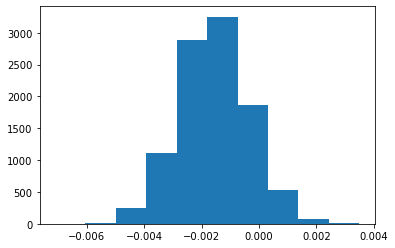

In [43]:
p_diffs = np.array(p_diffs)
plt.hist(p_diffs);

In [44]:
np.mean(p_diffs)

-0.001573152940682549

In [46]:
# observed - actual difference between the original two samples
obs_diff = df2.query('group == "treatment"')['converted'].mean() - df2.query('group == "control"')['converted'].mean()
obs_diff

-0.0015782389853555567

**Sampling distribution for the difference in proportions of treatment and control:**

**This histogram displays the distribution of mean differences in proportions between control and treatment groups sampled randomly from the actual dataset repeated 10.000 times**

**The distribution seems normally distributed as expected with a mean of -0.0015 which is close to the actual observed sample mean between the two groups.**

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

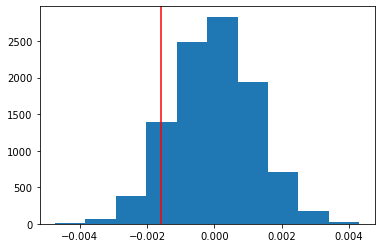

In [47]:
# let's simulate draws from the sampling distribution under the null hypothesis. 
# let's create a normal distribution centered at zero, with the same st dev and size as the simulated sampling distribution
# let's also see where our observed statistic falls.
null_vals = np.random.normal(0, p_diffs.std(), p_diffs.size)
plt.hist(null_vals);
plt.axvline(obs_diff, c='red');


In [48]:
# let's calculate the probability of a statistic higher than observed.
# Given this is a one tailed test, this also corresponds to the p value.
prob_higher = (null_vals > obs_diff).mean()
prob_higher

0.8984

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**This value is called p value in scientific terms. Since this value is bigger than the type 1 error rate of 0.05, we can conclude that we have failed to reject the null, and we have no reason to believe that the new page is better than the old page. This also means that there is %90 probability (very high) that you would obtain a mean difference value of -0.0015 (obs_diff) assuming that there is no difference between the old and new page (null). We have no reason to believe that our observed difference in proportion does not come from the null distrbution. Based on this result the new page should NOT be launched.**

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [49]:
import statsmodels.api as sm

convert_old = df2.query('group == "control"and converted == 1').user_id.count()
convert_new = df2.query('group == "treatment"and converted == 1').user_id.count()
n_old = df2.query('landing_page == "old_page"').user_id.count()
n_new = df2.query('landing_page == "new_page"').user_id.count()

convert_old, convert_new, n_old, n_new

(17489, 17264, 145274, 145310)

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [50]:
significance = 0.05

count = np.array([convert_new, convert_old])
nobs = np.array([n_new, n_old])
z_score, p_value = sm.stats.proportions_ztest(count, nobs, alternative='larger')
                
print('z_score: %0.3f, p_value: %0.3f' % (z_score, p_value))
if p_value > significance:
   print ("Fail to reject the null hypothesis")
else:
   print ("Reject the null hypothesis")

z_score: -1.311, p_value: 0.905
Fail to reject the null hypothesis


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**A z-score of -1.31 means that the observed difference score between the two samples is 1.31 standard deviation below the population mean under the null. This also means that the obs value resides outside and to the right of the lower extreme end of the distribution with a cutoff value of p=.05. The z value falls into the region of non-extreme values - what we would have expected by null.**

**Similarly, the p value of 0.905 is bigger than the cut-off value of 0.05, so we can conclude that we have failed to reject the null, and we have no reason to believe that the new page is better than the old page.**

**The two p values calculated in different ways in parts j and k are very close to one another - so they agree.**

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**LOGISTIC REGRESSION**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [51]:
df2['ab_page'] = pd.get_dummies(df2['group'])['treatment']
df2['intercept'] = 1

In [52]:
df2.head()

,user_id,timestamp,group,landing_page,converted,ab_page,intercept
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,0,1


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [60]:
import statsmodels.api as sm
df2['intercept'] = 1
log_mod = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])

d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [61]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Wed, 20 Jan 2021   Pseudo R-squ.:               8.077e-06
Time:                        13:58:51   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

**The aim of the logistic regression is to see whether we can predict a difference in conversion based on whether the customer sees page new versus old. Its null hypothesis is that the beta (regression coefficient or the slope) is zero -  that ab_page has no effect on conversion. The alternative is that it is NOT zero.**

**The conclusion for the logistic regression matches the result from the two sample test, although the p values are not the same. the p velue of 0.190 entails that we have no reason to believe that the regression slope is different from zero (that conversion rate changes based on ab_page).** 

**The regression test is also a two tailed test unlike the test we have performed for A/B test. So that might be part of the reason for why we have observer a smalled p value here too.**  

**Regression is also about how well we can predict whether a customer would convert or not based on the opage they see. From that perspective it has a predictory power as well.**

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**There might be other factors influencing whether or not an individual converts such as gender, age, or time of the week they have seen the page.** 

**Adding those variables to the regression model might increase the predictability power. However adding additional terms that has no value would reduce the power of the model, so we have to be careful when adding more variables.**

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [54]:
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')

In [55]:
df_new.head()

,country,timestamp,group,landing_page,converted,ab_page,intercept
user_id,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,0,1
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,0,1
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1


In [56]:
# Create the necessary dummy variables
df_new[['UK', 'US', 'CA']] = pd.get_dummies(df_new['country'])

In [57]:
df_new.head()

,country,timestamp,group,landing_page,converted,ab_page,intercept,UK,US,CA
user_id,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,0,1,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,0,1,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,0


In [58]:
df_new['intercept'] = 1
log_mod2 = sm.Logit(df_new['converted'], df_new[['intercept', 'ab_page', 'CA','UK']])
results2 = log_mod2.fit()
results2.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Wed, 20 Jan 2021   Pseudo R-squ.:               2.323e-05
Time:                        13:49:21   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9794      0.013   -155.415      0.000      -2.004      -1.954
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
CA            -0.0099      0.013     -0.743      0.457      -0.036       0.016
UK            -0.0506      0.028     -1.784      0.074      -0.106       0.005
==============================================================================
"""

In [63]:
1/np.exp(results2.params)

intercept    7.238314
ab_page      1.015056
CA           1.009932
UK           1.051944
dtype: float64

**The p values of 0.457 and 0.074 (for CA and UK) are greater than the error rate of 0.05. Therefore, we don't have a reason to predict that country has much of an impact on conversion rate. Here the comparison country is US. The exponentiated and reversed coefficient values also entail compared to US, users from CA and UK are 1.009 and 1.05 times more likely to convert given all other conditions are constant. These numbers also confirm that there does not seem to be a real effect of country on conversion.**

**Similarly ab_page p value remains very close to the previous model (0.191) - still not statisticallty significant, and the exponentiated and reversed  coefficient of 1.015 entails converting with the new page is 1.015 times LESS likely - which is nonsignificant.**

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.


In [64]:
df_new['ab_page*UK'] = df_new['ab_page']*df_new['UK']
df_new['ab_page*CA'] = df_new['ab_page']*df_new['CA']
df_new.head()

,country,timestamp,group,landing_page,converted,ab_page,intercept,UK,US,CA,ab_page*UK,ab_page*CA
user_id,,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,0,1,0,1,0,0,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,1,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0,0,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,0,1,0,1,0,0,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,0,0,0


In [65]:
#Fit Your Linear Model And Obtain the Results
df_new['intercept'] = 1
log_mod3 = sm.Logit(df_new['converted'], df_new[['intercept', 'ab_page', 'UK','CA', 'ab_page*UK', 'ab_page*CA']])
results3 = log_mod3.fit()
results3.summary()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Wed, 20 Jan 2021   Pseudo R-squ.:               3.482e-05
Time:                        14:13:14   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1920
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9922      0.016   -123.457      0.000      -2.024      -1.961
ab_page        0.0108      0.023      0.475      0.635      -0.034       0.056
UK            -0.0118      0.040     -0.296      0.767      -0.090       0.066
CA             0.0057      0.019      0.306      0.760      -0.031       0.043
ab_page*UK    -0.0783      0.057     -1.378      0.168      -0.190       0.033
ab_page*CA    -0.0314      0.027     -1.181      0.238      -0.084       0.021
==============================================================================
"""

**Adding the interaction terms did not make a difference either since both ab_page*UK and ab_page*CA p values are lower than 0.05 (0.168 and 0.238). All other variables remain nonsignifant as well.**

<a id='conclusions'></a>
## Conclusions
**My conclusion is that it is probably not a good idea to add country and its interactions into the model. We should probably look elsewhere, such as time stamps to see if seeing the pages on a weekend or weekday has an impact on conversion. We could also look into the time of the day (such as day or evening time), so specific days of the week. If we had the data it would also be interesting to look at a possible effect of age and gender.**